# Jan Smoleń PD 5


In [16]:
from sklearn.decomposition import PCA
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling
import copy
from sklearn.decomposition import PCA
import sklearn.metrics
from sklearn import manifold
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [9]:
df=pd.read_csv("clustering.csv", header=None)

In [11]:
df.columns=["x", "y"]

C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

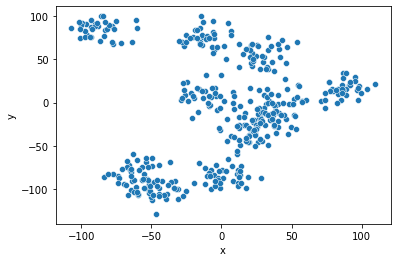

In [13]:
sns.scatterplot(df["x"], df["y"], marker = 'o')

## K-means

In [14]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

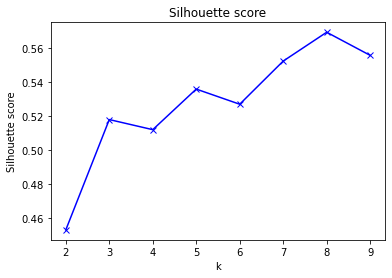

In [17]:
cluster_num_seq = range(2, 10)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title("Silhouette score")
plt.show()

Text(0, 0.5, 'Inertia')

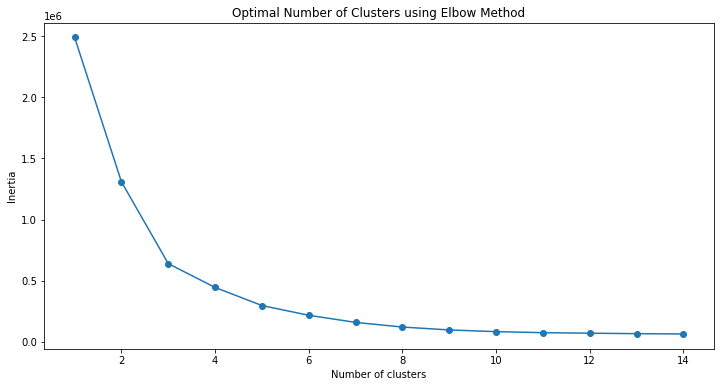

In [19]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

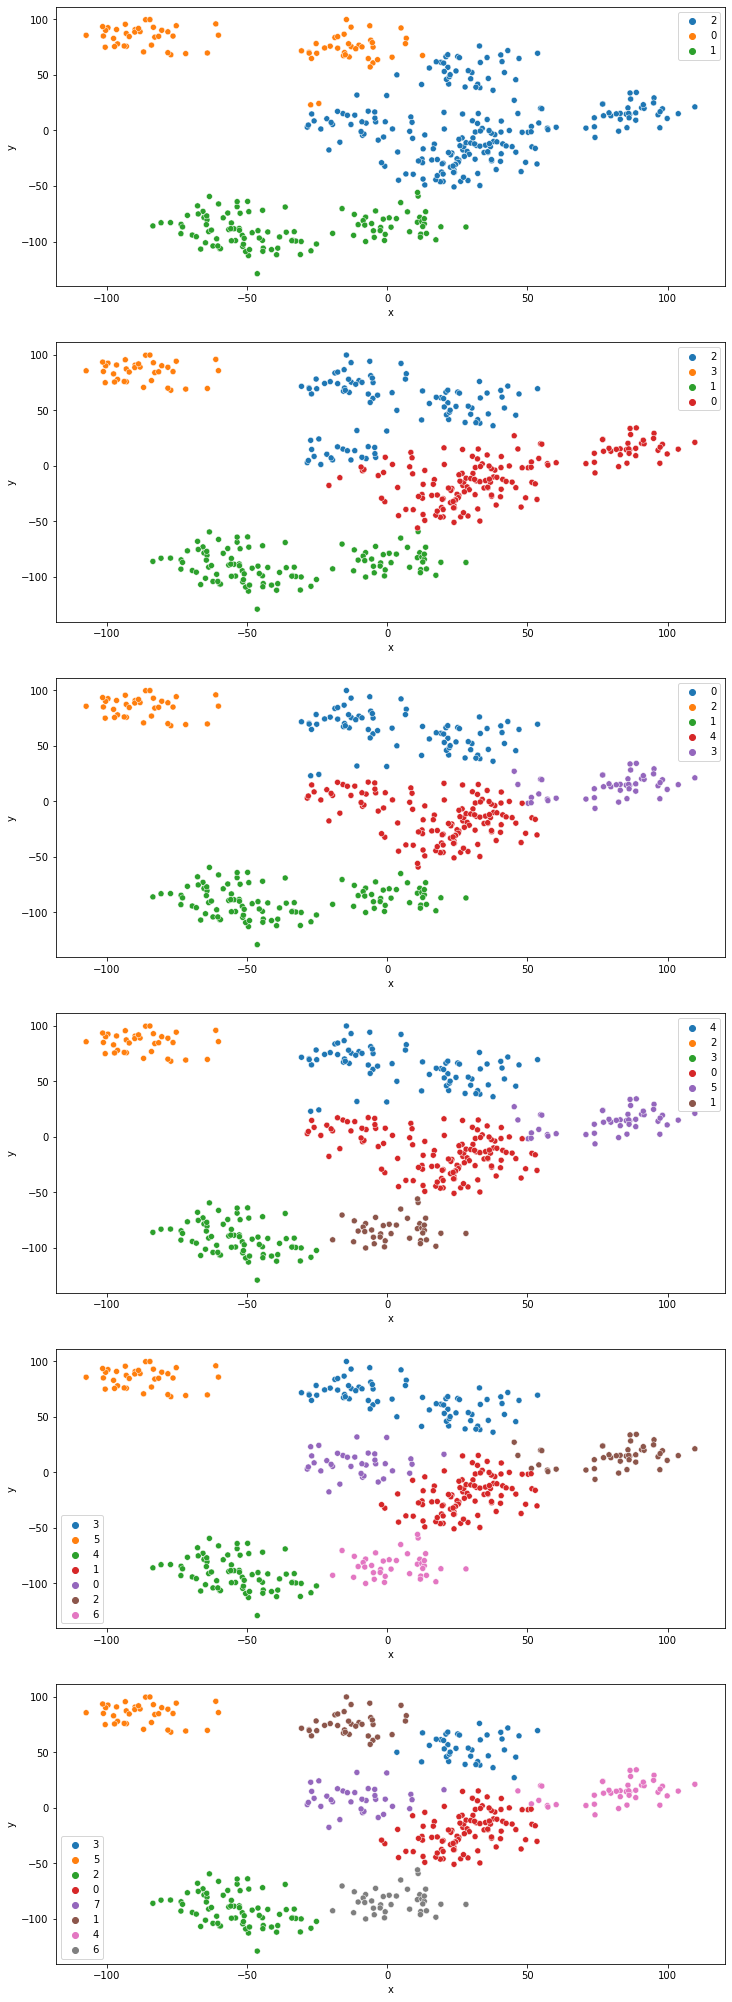

In [30]:
fig, axs = plt.subplots(ncols=1, nrows=6, figsize=(12, 36))
rng=range(3, 9)
c=0
lst=[]
for i in rng:
    km=KMeans(n_clusters=i)
    labs=km.fit_predict(df)
    lst=[]
    for i in range(len(labs)):
        lst.append(str(labs[i]))
    sns.scatterplot(data=df, x="x", y="y", marker = 'o', hue=lst, ax=axs[c])
    c+=1

Ciężko wybrać optymalną liczbę klastrów, szczególnie w takim abstrakcyjnym przypadku gdy nie znamy natury problemu. Dwie najlepsze opcje wg mnie to 3 i 8 - 3 ze względu na metode łokcia, a 8 ze wzg na wysokie silhoutte score. 

## Klastrowanie hierarchiczne

<AxesSubplot:xlabel='x', ylabel='y'>

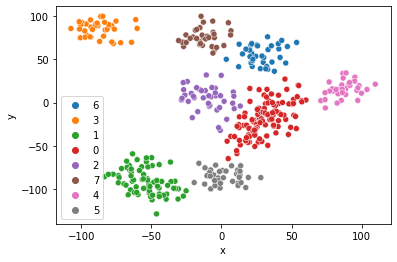

In [36]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=8)
labs = model.fit_predict(df)
lst=[]
for i in range(len(labs)):
    lst.append(str(labs[i]))
sns.scatterplot(data=df, x="x", y="y", marker = 'o', hue=lst)

Patrząc na wyniki klastrowania hierarchicznego dla k=8 widać pewne różnice w porównaniu do klastrowania k-means. Najlepszy przykład to punkty pomiędzy klastrem 0 i 4 (czerwonym i różowym). Zgodnie z intuicją dot. działania obydwu algorytmów, w klastrowaniu hierarchicznym klaster 4 jest bardziej 'zbity'. Natomiast w klastrowaniu k-means jeszcze skrajne punkty leżące w 'chmurze' klastra 0 zostały zaklasyfikowane do klastra 4. Biorąc to pod uwagę, w tym przypadku klastrowanie hierarchiczne wydaje się działać lepiej.